In [41]:
import pandas as pd
import numpy as np
from scipy import stats
import scipy
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import linear_model
from sklearn import neighbors
from sklearn.model_selection import cross_val_score

import psycopg2

In [2]:
conn_str = "host={} dbname={} user={} password={}".format('localhost', 'airbnb_la', 'jlanders', '')
conn = psycopg2.connect(conn_str)


In [4]:
columns = ['longitude', 'room_type', 'price', 'number_of_reviews']
table = 'listings'
query = 'select '+', '.join(columns)+' from '+table

select longitude, room_type, price, number_of_reviews from listings


In [5]:
df = pd.read_sql(query, con=conn)

In [8]:
df['room_type_bin'] = [1 if typ == 'Private room' else 0 for typ in df.room_type]

In [14]:
for col in df.columns:
    try:
        df[col] = pd.as_numeric(df[col])
    except:
        print(col)

room_type


In [16]:
X = df[['room_type_bin', 'longitude', 'number_of_reviews']]
# X_normed = pd.DataFrame({'loudness':stats.zscore(music.loudness), 'duration':stats.zscore(music.duration)})

Y = df['price']
# Y_normed=stats.zscore(Y)

In [ ]:
# Trying a different dataset

In [145]:
small_set= ['fixed acidity', 'volatile acidity',
        'density', 'alcohol','sulphates']

In [147]:
df2 = pd.read_csv('winequality-white.csv', delimiter=';')
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(df2[small_set+['quality']])

df2_scaled = df2[small_set+['quality']]
df2_scaled[small_set+['quality']] = scaler.fit_transform(df2_scaled)

/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/usr/

In [159]:
df2_scaled.describe()

,fixed acidity,volatile acidity,density,alcohol,sulphates,quality
count,4.898000e+03,4.898000e+03,4.898000e+03,4.898000e+03,4.898000e+03,4.898000e+03
mean,-3.481630e-16,4.497106e-16,3.256485e-14,-3.713739e-16,-8.218098e-16,2.901359e-17
std,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00
min,-3.620351e+00,-1.966985e+00,-2.313038e+00,-2.043297e+00,-2.364709e+00,-3.249862e+00
25%,-6.575011e-01,-6.771010e-01,-7.707066e-01,-8.242757e-01,-6.997104e-01,-9.913739e-01
50%,-6.493106e-02,-1.809917e-01,-9.609320e-02,-9.286267e-02,-1.739212e-01,1.378701e-01
75%,5.276390e-01,4.143393e-01,6.930457e-01,7.198184e-01,5.271310e-01,1.378701e-01
max,8.705106e+00,8.153643e+00,1.503130e+01,2.995326e+00,5.171602e+00,3.525602e+00


In [153]:
Y = df2_scaled.quality
X = df2_scaled[small_set]

Y = df2.quality
X = df2[small_set]
#  'total sulfur dioxide','sulphates',
# 'free sulfur dioxide', 'citric acid','total sulfur dioxide','residual sugar','pH','chlorides', 

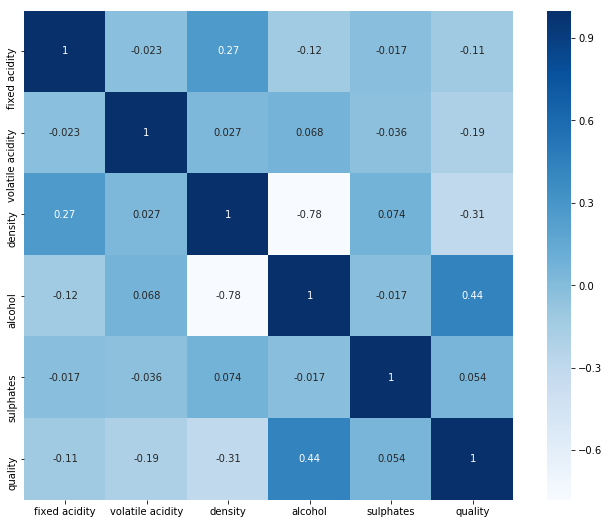

In [139]:
corrmat = df2[['fixed acidity', 'volatile acidity',
        'density', 'alcohol','sulphates','quality']].dropna().corr()

fig, ax = plt.subplots(1,1, figsize = (12,9))
sns.heatmap(corrmat, vmax = 1, square = True, annot=True,cmap='Blues')

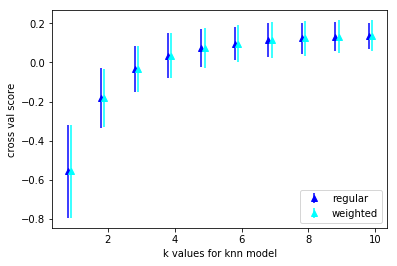

In [154]:

score_d= {'knn':[], 'knn_w':[],'knn_n':[], 'knn_nw':[]}
for n in range(1,11): 
    knn = neighbors.KNeighborsRegressor(n_neighbors=n)
    score = cross_val_score(knn, X, Y, cv=5)
#     print("\nUnweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
    score_d['knn'].append(score)

    knn_w = neighbors.KNeighborsRegressor(n_neighbors=n, weights='distance')
    score = cross_val_score(knn_w, X, Y, cv=5)
#     print("\nWeighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
    score_d['knn_w'].append(score)

#     knn_n = neighbors.KNeighborsRegressor(n_neighbors=n)
#     score = cross_val_score(knn_n, X_normed, Y, cv=5)
# #     print("\nUnweighted normed Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
#     score_d['knn_n'].append(score)
    
#     knn_nw = neighbors.KNeighborsRegressor(n_neighbors=n, weights='distance')
#     score = cross_val_score(knn_nw, X_normed, Y, cv=5)
# #     print("\nWeighted and normed Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
#     score_d['knn_nw'].append(score)

# plt.scatter(list(range(1,10)), [score_d['knn'][ik].mean() for ik in range(len(score_d['knn']))])
plt.errorbar([ik-.2 for ik in range(1,11)], [score_d['knn'][ik].mean() for ik in range(len(score_d['knn']))], [score_d['knn'][ik].std() for ik in range(len(score_d['knn']))], linestyle='None', marker='^', color= 'blue', label = 'regular')
plt.errorbar([ik-.1 for ik in range(1,11)], [score_d['knn'][ik].mean() for ik in range(len(score_d['knn']))], [score_d['knn_w'][ik].std() for ik in range(len(score_d['knn_w']))], linestyle='None', marker='^', color = 'cyan', label='weighted')
# plt.errorbar([ik for ik in range(1,11)], [score_d['knn'][ik].mean() for ik in range(len(score_d['knn']))], [score_d['knn_n'][ik].std() for ik in range(len(score_d['knn_n']))], linestyle='None', marker='^', color = 'red', label='normalized')
# plt.errorbar([ik+.1 for ik in range(1,11)], [score_d['knn'][ik].mean() for ik in range(len(score_d['knn']))], [score_d['knn_nw'][ik].std() for ik in range(len(score_d['knn_nw']))], linestyle='None', marker='^', color = 'magenta', label='normalized and weighted')
plt.legend(loc=4)
plt.xlabel('k values for knn model')
plt.ylabel('cross val score')



In [155]:
from sklearn import svm
clf = svm.SVR()
score = cross_val_score(clf, X, Y, cv=5)
print(score)

/usr/local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default 

[ 0.22524208  0.24358222  0.27423396  0.25063562  0.15173756]


In [156]:
sgd_reg = linear_model.SGDRegressor(alpha=0.0001, average=False, early_stopping=False,
       epsilon=0.1, eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=1000,
       n_iter=None, n_iter_no_change=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, tol=0.001, validation_fraction=0.1,
       verbose=0, warm_start=False)

score = cross_val_score(sgd_reg, X, Y, cv=5)
print(score)

[ 0.07286353  0.21281437  0.24490092  0.19547021  0.09437357]


In [157]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,Y,random_state=3)

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))
score = cross_val_score(regr, X, Y, cv=5)
print(score)

0.259079588407
[ 0.1942534   0.26976127  0.24888619  0.28568137  0.14917789]


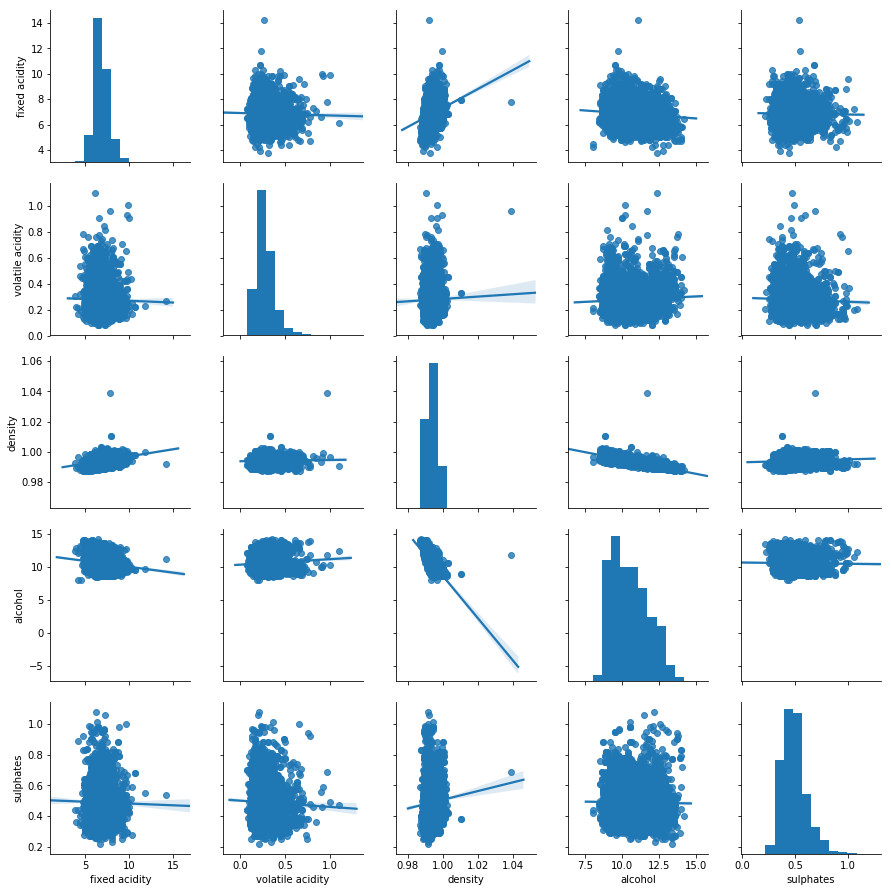

In [167]:
g = sns.pairplot(data = df2[small_set],kind = 'reg')

In [168]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X)
pca.transform(X_test)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

array([[-0.11371486, -1.994724  ],
       [-1.32050659,  1.26013707],
       [ 0.08578073,  0.66598375],
       ..., 
       [ 0.32046864, -1.52368596],
       [-1.48073491,  0.32582113],
       [-1.10760962, -0.12373977]])